In [10]:
%reset -f

In [11]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from utils.aiwt import cjkfun, cjkfun2, z_g, CompressInterp, IncreaseInterp, adapt_CjJ4
from utils.pde import Precise, theta1_2d
from utils.tools import Draw, DrawCollocationPoint

In [12]:
# 分解级别，初始级别
J = 15
j0 = 0

# 函数区间
a = 0
b = 2

# “雷诺数”
Re = 1000

# 离散间隔
deltax = (b-a)/(2**J)

# 离散
XJ0 = np.arange(a, b+deltax, deltax).reshape(1,-1)

# V0空间
V0 = np.sin(np.pi * XJ0)

# 与邻点有关的量
M = 1
CC = 1

# 偏微分方程的时间量与时间步长 （数值解迭代参数）
t = 0.4
tao = 0.001

# 阈值
eps0 = 0.005

# 判断前后两次得到的配点是否完全相同
same = np.inf

# 画图时需要的参数
nn_dict = {1:[1,'0.01'], 400:[3,'0.4'], 600:[5,'0.6'], 800:[1,'0.8'],
           1200:[3,'1.2'], 600:[5,'1.6'], 2000:[1,'2.0'], 2400:[3,'2.4'],
           2600:[5,'2.6'], 2800:[1,'2.8'], 3000:[3,'3.0'], 3200:[5,'3.2']}

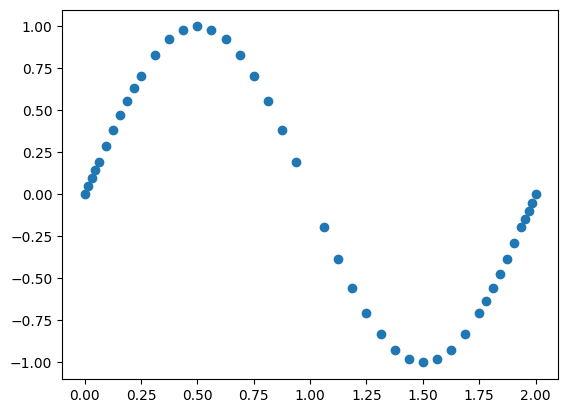

In [13]:
nn = 1

# 获取配点
cjk, cjknum, zJc, zJcnum = cjkfun(V0, J, j0, a, b, eps0)

# 扩展了每层的配点
gjk, gjknum, gJc, gJcnum = z_g(j0, J, cjk, cjknum, zJc, zJcnum, a, b, M, CC)

# 实际位置索引得的自变量值【x的值】
XJ = a + deltax * gJc

# 压缩数据量（只留下一些有涉及到计算的值）
# 即：所有配点实际位置索引得到的自变量值对应的因变量值
V0 = CompressInterp(XJ0, V0, XJ)
plt.scatter(XJ, V0[:,0])

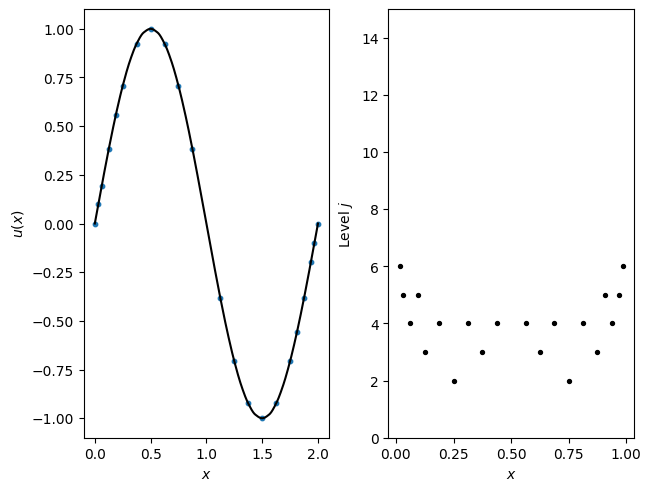

In [14]:
# 画图
fig, axs=plt.subplots(1,2,constrained_layout=True)
num, Title = nn_dict.get(nn)
Draw(axs[0], XJ, V0, cjk, cjknum, zJc, a, b, j0, J)
DrawCollocationPoint(axs[1], cjk, cjknum, a, b, j0,J)